# B0 map calculation tutorial

Start by importing the required libraries and defining some settings:

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import warnings

from ukat.data import fetch
from ukat.mapping.b0 import b0map

# Ensure figures are rendered in the notebook
%matplotlib inline

Tell python where to store the B0 map NIfTI file we will generate. We will store it in a directory called `b0_calculation_output` in the `tutorials` directory.

In [2]:
# Initialise output path for B0 maps
OUTPUT_DIR = os.path.join(os.getcwd(), "b0_calculation_output")
#############################################################################################
OUTPUT_PATH_PHILIPS = os.path.join(OUTPUT_DIR, 'B0MapPHILIPS-2.nii.gz')
OUTPUT_PATH_GE = os.path.join(OUTPUT_DIR, 'B0MapGE.nii.gz')
OUTPUT_PATH_SIEMENS = os.path.join(OUTPUT_DIR, 'B0MapSIEMENS-2.nii.gz')
#############################################################################################
OUTPUT_PATH_PHILIPS_UNWRAPPED = os.path.join(OUTPUT_DIR, 'B0MapPHILIPS-2-UNWRAPPED.nii.gz')
OUTPUT_PATH_GE_UNWRAPPED = os.path.join(OUTPUT_DIR, 'B0MapGE-UNWRAPPED.nii.gz')
OUTPUT_PATH_SIEMENS_UNWRAPPED = os.path.join(OUTPUT_DIR, 'B0MapSIEMENS-2-UNWRAPPED.nii.gz')
#############################################################################################
OUTPUT_PATH_PHILIPS_WRAPAROUND = os.path.join(OUTPUT_DIR, 'B0MapPHILIPS-2-WRAPAROUND.nii.gz')
OUTPUT_PATH_GE_WRAPAROUND = os.path.join(OUTPUT_DIR, 'B0MapGE-WRAPAROUND.nii.gz')
OUTPUT_PATH_SIEMENS_WRAPAROUND = os.path.join(OUTPUT_DIR, 'B0MapSIEMENS-2-WRAPAROUND.nii.gz')

Retrieve B0 test data using our data fetcher.
This will return 4 variables:
* `magnitude`: a 4D array with the magnitude data at all echo times.
* `phase`: a 4D array with the phase data at all echo times.
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).
* `TEs`: an array containing the echo times, in seconds.

In [ ]:
# Fetch test data
magnitude_philips, phase_philips, affine_philips, TE_philips = fetch.b0_philips(2)
magnitude_ge, phase_ge, affine_ge, TE_ge = fetch.b0_ge()
magnitude_siemens, phase_siemens, affine_siemens, TE_siemens = fetch.b0_siemens(2)

In [ ]:
# Store the different manufacturers' images and parameters in lists
phases = [phase_philips, phase_ge, phase_siemens]
affines = [affine_philips, affine_ge, affine_siemens]
TEs = [TE_philips, TE_ge, TE_siemens]
output_names = ['Philips_2', 'GE','Siemens_2']
output_paths = [OUTPUT_PATH_PHILIPS, OUTPUT_PATH_GE, OUTPUT_PATH_SIEMENS]
output_paths_unwrapped = [OUTPUT_PATH_PHILIPS_UNWRAPPED, OUTPUT_PATH_GE_UNWRAPPED, OUTPUT_PATH_SIEMENS_UNWRAPPED]
output_paths_wraparound = [OUTPUT_PATH_PHILIPS_WRAPAROUND, OUTPUT_PATH_GE_WRAPAROUND, OUTPUT_PATH_SIEMENS_WRAPAROUND]

Compute the B0 map using the `B0Map` class implemented in `mapping`:

## B0 map:

In [ ]:
# Compute, save and plot the central slice of B0 map for all manufacturers
fig, axes = plt.subplots(len(TEs), figsize=(15,15))
fig.suptitle('B0Map (rad/s)')
for manufacturer in range(len(TEs)):
    b0 = b0map(phases[manufacturer], TEs[manufacturer] * 1000, unwrap=False)
    # Save to Nifti
    b0_nifti_object = nib.Nifti1Image(b0, affine=affines[manufacturer])
    nib.save(b0_nifti_object, output_paths[manufacturer])
    # Plot the output maps
    b0_central_slice = np.rot90(b0[:,:,int(np.shape(b0)[2]/2)], 1)
    axes[manufacturer].set_title(output_names[manufacturer])
    im = axes[manufacturer].imshow(b0_central_slice, cmap='viridis',vmin=-1000, vmax=1000)
    fig.colorbar(im, ax=axes[manufacturer])

## B0 map with Unwrapping:

In [ ]:
# Compute, save and plot the central slice of B0 map for all manufacturers
fig, axes = plt.subplots(len(TEs), figsize=(15,15))
fig.suptitle('B0Map with Unwrapping (rad/s)')
for manufacturer in range(len(TEs)):
    b0 = b0map(phases[manufacturer], TEs[manufacturer] * 1000)
    # Save to Nifti
    b0_nifti_object = nib.Nifti1Image(b0, affine=affines[manufacturer])
    nib.save(b0_nifti_object, output_paths_unwrapped[manufacturer])
    # Plot the output maps
    b0_central_slice = np.rot90(b0[:,:,int(np.shape(b0)[2]/2)], 1)
    axes[manufacturer].set_title(output_names[manufacturer])
    im = axes[manufacturer].imshow(b0_central_slice, cmap='viridis',vmin=-1000, vmax=1000)
    fig.colorbar(im, ax=axes[manufacturer])

## B0 map with Unwrapping (wrap_around=True):

In [ ]:
# Compute, save and plot the central slice of B0 map for all manufacturers
fig, axes = plt.subplots(len(TEs), figsize=(15,15))
fig.suptitle('B0Map with Unwrapping (rad/s)')
for manufacturer in range(len(TEs)):
    b0 = b0map(phases[manufacturer], TEs[manufacturer] * 1000, wrap_around=True)
    # Save to Nifti
    b0_nifti_object = nib.Nifti1Image(b0, affine=affines[manufacturer])
    nib.save(b0_nifti_object, output_paths_wraparound[manufacturer])
    # Plot the output maps
    b0_central_slice = np.rot90(b0[:,:,int(np.shape(b0)[2]/2)], 1)
    axes[manufacturer].set_title(output_names[manufacturer])
    im = axes[manufacturer].imshow(b0_central_slice, cmap='viridis',vmin=-1000, vmax=1000)
    fig.colorbar(im, ax=axes[manufacturer])

## Phantom Philips

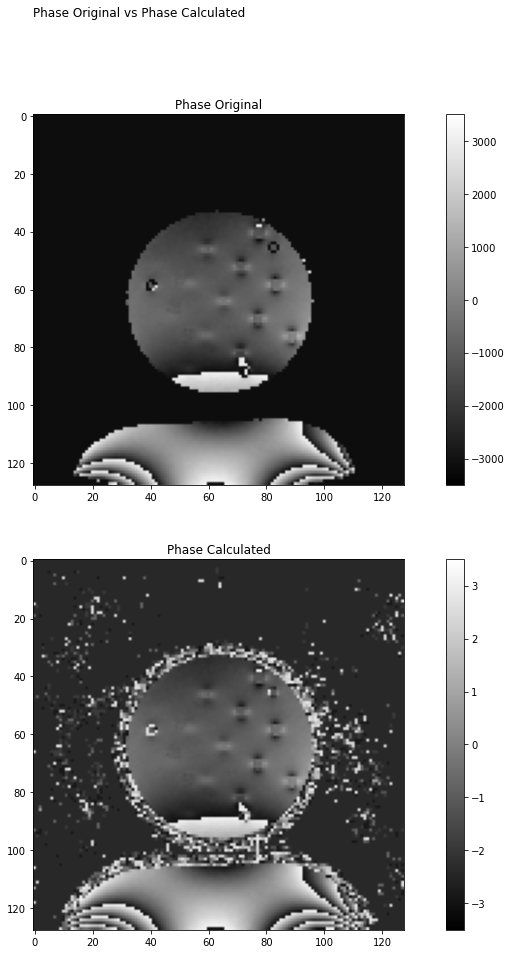

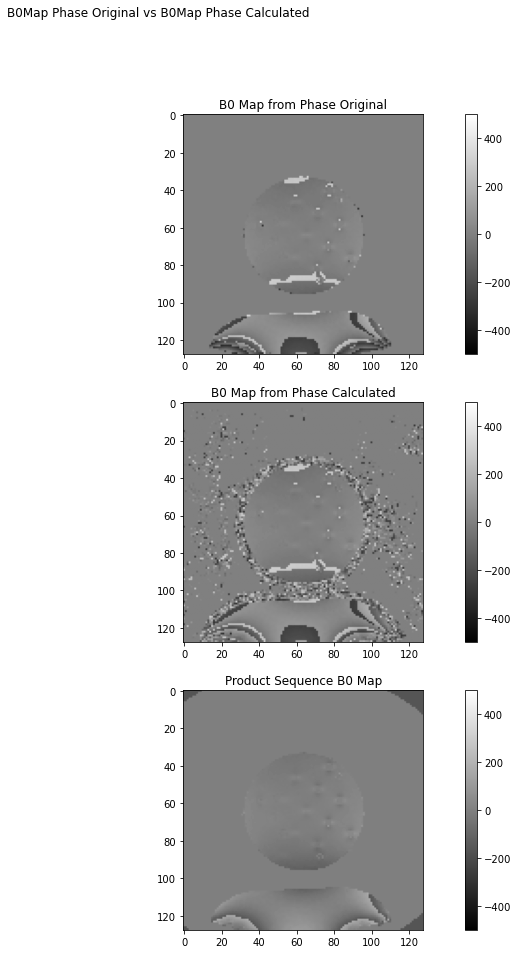

In [3]:
# Philips Phantom
magnitude_philips, phase_original, phase_calculated, real_philips, imaginary_philips, affine_philips, TEs = fetch.b0_philips_phantom()

# Save Phase Calculated to Nifti
phase_nifti_object = nib.Nifti1Image(phase_calculated, affine=affine_philips)
nib.save(phase_nifti_object, os.path.join(OUTPUT_DIR, 'CalculatedPhasePhantom.nii.gz'))

# Phase Comparison
fig, axes = plt.subplots(2, figsize=(15,15))
fig.suptitle('Phase Original vs Phase Calculated')
##############################################
axes[0].set_title("Phase Original")
original_central_slice = np.rot90(phase_original[:,:,int(np.shape(phase_original)[2]/2), 0], 1)
im = axes[0].imshow(original_central_slice, cmap='gray',vmin=-3500, vmax=3500)
fig.colorbar(im, ax=axes[0])
##############################################
axes[1].set_title("Phase Calculated")
calculated_central_slice = np.rot90(phase_calculated[:,:,int(np.shape(phase_calculated)[2]/2), 0], 1)
im2 = axes[1].imshow(calculated_central_slice, cmap='gray',vmin=-3.5, vmax=3.5)
fig.colorbar(im2, ax=axes[1])

# B0 Map Comparison
fig2, axes2 = plt.subplots(3, figsize=(15,15))
fig2.suptitle('B0Map Phase Original vs B0Map Phase Calculated')
##############################################
b0_original = b0map(phase_original, TEs * 1000, unwrap=False)
axes2[0].set_title("B0 Map from Phase Original")
original_central_slice = np.rot90(b0_original[:,:,int(np.shape(phase_original)[2]/2)], 1)
im2 = axes2[0].imshow(original_central_slice, cmap='gray',vmin=-500, vmax=500)
fig2.colorbar(im2, ax=axes2[0])
##############################################
b0_calculated = b0map(phase_calculated, TEs * 1000, unwrap=False)
axes2[1].set_title("B0 Map from Phase Calculated")
calculated_central_slice = np.rot90(b0_calculated[:,:,int(np.shape(phase_calculated)[2]/2)], 1)
im2 = axes2[1].imshow(calculated_central_slice, cmap='gray',vmin=-500, vmax=500)
fig2.colorbar(im2, ax=axes2[1])
##############################################
_, b0_product = fetch.b0_product_philips_phantom()
axes2[2].set_title("Product Sequence B0 Map")
product_central_slice = np.rot90(b0_product[:,:,int(np.shape(b0_product)[2]/2)], 1)
im3 = axes2[2].imshow(product_central_slice, cmap='gray',vmin=-500, vmax=500)
fig2.colorbar(im3, ax=axes2[2])